# Schelling's Seasonal Sport World

#### Your Name Here: Taylor Larrechea

### Intro

In this make believe world there are two distinct groups of people, and they do not get along. These two groups are Winter sports fans and Summer sports fans. Both groups think that their seasonal sports are the best, and they constantly argue with one another. They have collectively decided that the best plan of action is to move around so that everyone has some neighbors that like the same sports as they do. In this assignment you will simulate a torus model that represents the world that was just described.

### Directions

There are three different scenarios that need to be implemented to fully complete this assignment:

Scenario 1: Every home has to have at least 4 or more neighbors that are the same as them.

Scenario 2: Every home has to have between 1 and 4 (inclusive) neigbors that are the same as them.

Scenario 3: The third scenario adds a third neighbor that likes BOTH winter and summer sports. These neighbors are sufficent for both summer sport neighbors and winter sport neihbors. In this scenario we still make sure every home has at least 4 like minded neighbors.

### Grading Scale

#### 100 Points Total

Make sure that you start with a normal array and then randomize it. You cannot hardcode a matrix that already meets the requirements. It HAS to be simulated by moving homes that do not meet the specified requirement to a vacant home.


### Packages

Import the necessary packages. You should be able to complete the assignment by only using these. But, feel free to import other packages if you'd like.

In [969]:
import numpy as np
from numpy.random import shuffle
import random as rand
import matplotlib.pyplot as plt
from matplotlib import colors

### Write a function to initialize the starting matrix for each scenario.

The first and second scenario can use the same function because they only use 2 types of neighbors. You should generate an array 100 people, 50 Winter sports fans and 50 Summer sports fans for the first 2 scenarios. The third scenario will have 33 Winter fans, 33 Summer fans, and 34 Summer/Winter fans. After you generate the array, randomly select 12 homes and set them to 0. 0 will represent a vacant home for this assignment. The Winter and Summer sport fans will be represented by a value of 1 and a value of 2. Homes that do not meet the neighbor requirement will be moved to these vacant homes until all of the homes meet the specified condition. After setting some homes to be vacant, we need to reshape our array into a 10x10 matrix instad of a 1x100 array. Once this is done we can begin the simulation.  

I highly recommend looking into the documentation for numpy if you have not used it before. But, np.random.randint() and np.random.shuffle() might be helpful when creating this function.

#### Function to initialize the starting matrix for the 1st and 2nd scenario
#### 10 Points:

In [970]:
#Scenario 1 & 2 Start-Up
def startUp1and2():
    #make a randomized array with 50 winter sports fans and 50 summer sports fans
    #once you have a randomized initial array, randomly select 12 homes and make them vacant
    #reshape our array so it is in a 10x10 matrix rather than a 1x100 array
    #print the world so you can look at the matrix before and after running the schelling algorithm
    initialArray = np.array([1]*50 + [2]*50)
    np.random.shuffle(initialArray)
    randomIndices = np.random.choice(range(len(initialArray)), size=12, replace=False)
    initialArray[randomIndices] = 0
    world = np.reshape(initialArray, (10, 10))
    return world

In [971]:
#Sanity Check
test = startUp1and2()
print(test)

[[2 1 1 1 2 2 2 0 2 1]
 [1 2 2 2 1 1 1 1 1 1]
 [1 2 2 2 2 2 2 2 2 2]
 [1 2 0 1 1 1 2 2 1 0]
 [2 2 1 1 0 1 1 2 0 2]
 [1 0 1 2 1 2 0 1 1 0]
 [0 2 1 2 2 2 2 2 2 0]
 [1 1 1 0 2 2 1 1 1 1]
 [2 2 1 1 1 2 2 2 1 2]
 [2 2 0 1 2 1 2 1 2 1]]


#### Function to initialize the starting matrix for the 3rd scenario
#### 10 Points:

In [972]:
#Scenario 3 Start-Up
def startUp3():
    #make a randomized array with 33 Winter sport fans, 33 summer sport fans, and 34 winter/summer sport fans
    #once you have a randomized initial array, randomly select 12 homes and make them vacant
    #reshape our array so it is in a 10x10 matrix rather than a 1x100 array
    #print the world so you can look at the matrix before and after running the schelling algorithm
    initialArray = np.array([1]*33 + [2]*33 + [3]*34)
    np.random.shuffle(initialArray)
    randomEmptyIndices = np.random.choice(range(len(initialArray)), size=12, replace=False)
    initialArray[randomEmptyIndices] = 0
    world = np.reshape(initialArray, (10, 10))
    return world

In [973]:
#Sanity Check
test2 = startUp3()
print(test2)


[[0 2 3 1 2 2 0 3 2 3]
 [1 3 0 1 1 2 2 2 2 2]
 [3 1 1 2 0 1 1 1 3 2]
 [1 1 0 2 3 0 1 1 2 3]
 [1 2 1 1 2 1 3 1 1 3]
 [3 2 2 3 0 3 2 3 1 3]
 [0 3 3 3 2 3 1 0 2 0]
 [1 3 2 2 3 3 2 1 1 2]
 [2 2 1 2 3 3 1 2 3 3]
 [2 3 3 2 3 1 1 0 2 0]]


### Determine which cells are vacant

Create a function to find the locations of the vacant spaces. There are many ways to do this, one way is to loop through our matrix and append the indices where the given home is vacant.

#### 10 Points:

In [974]:
#determines the locations in the matrix where homes are vacant
#function takes in matrix that contains neighbor info, we return the list of indices where the homes are vacant
def vacancies(world):
    vacant_homes = list('')
    #loop through every row in the world matrix:
        #Nested loop through every column in the current row of the world matrix:
            #if the current home is vacant (i.e. = 0)
                #append the current row/column indices to the vacant_homes list
    for i, row in enumerate(world):
        for j, column in enumerate(row):
            if (column == 0):
                vacant_homes.append((i,j))
    return vacant_homes

In [975]:
test = startUp1and2()
print(test)
print(vacancies(test))

[[1 1 1 1 2 2 1 0 2 2]
 [1 2 0 2 1 1 2 1 0 1]
 [2 2 2 2 1 2 1 2 2 1]
 [2 2 1 1 2 1 2 1 2 0]
 [2 1 2 2 1 1 1 1 0 1]
 [1 0 2 1 2 2 1 1 2 2]
 [2 2 1 0 2 2 2 1 2 2]
 [1 2 1 1 1 0 1 1 0 2]
 [0 1 0 1 2 2 0 2 2 1]
 [1 1 2 1 1 2 2 1 2 2]]
[(0, 7), (1, 2), (1, 8), (3, 9), (4, 8), (5, 1), (6, 3), (7, 5), (7, 8), (8, 0), (8, 2), (8, 6)]


### Move Neighbor

Create a function to move the people in a home that does not meeting the neighbor requirements to a vacant home. You should randomly choose a set of indices that are stored in 'vacant_homes' and perform a swap with current home type and the vacant home type. After the home is swapped return our updated world.

#### 10 Points:

In [976]:
#relocates a family that has insufficient neighbors to a random empty cell
#function takes in a row and column index, a list of indices containing the vacant homes, and a matrix of the world
def move(row, col, vacant_homes, world):
#     randomly choose a vacant_home from the list
#     make a temp variable to store the vacant home
#     move the new people into the vacant home
#     set the old home that was moved out of to the temp variable that stored the vacant home
    randomHomeIndex = np.random.randint(0, len(vacant_homes))
    randomHome = vacant_homes[randomHomeIndex]
    people = world[row,col]
    world[randomHome[0], randomHome[1]] = people
    world[row,col] = 0
    return world

### Determine Neighbors

Create a function to determine which neighbors are surrounding the current home. Keep in mind that this is a torus model. That means the far left column connects with the far right column, and the top row connects to the bottom row. Think of the model as a sphere or world rather than a grid or world. It might help to draw/print out an example matrix to help visualize what the neighbor would be for edge columns/rows.  **This can easily be solved by brute force (demonstrated below) using if-statements if you understand the layout of the torus matrix** . All cells will have 8 neighbors. Make sure to include all of them in the if-statements. **Any more elegant methods that achieve the required outcomes/output are welcome!**.

#### 10 Points:

In [977]:
#creates a list of neighboring cells that surround a given cell. 
#Left/Right/Top/Bottom columns/rows wrap around so everything is connected
#Brute Force Pseudo-Code Below
def whosAround(row, col, world):
    rows, columns = world.shape
    neighbors = []
    for i in range(-1,2):
        for j in range(-1,2):
            if (i == 0 and j == 0):
                continue
            neighbor_row = (row + i) % rows
            neighbor_column = (col + j) % columns
            neighbors.append(world[neighbor_row, neighbor_column])
    return neighbors

### Create a Schelling Model that implements the rules describes in Scenario 1: 

This means that a Winter sports fan must have at least 4 neighbors that are also Winter sports fans. If they do not have at least 4 neighbors we have to move them.

Use the helper functions you previously made to create this. i.e. vacancies(), whosAround(), and move() will all be necessary to complete this function.

#### 10 Points:

In [978]:
def SchellingModel1(world):
    diff_check = 0
    #loop through every row in the world matrix:
        #Nested loop through every column in the current row of the world matrix:
            #refresh list of vacant homes
            #refresh neighbors
            #get value of current row/col location
            #set count of same neighbor = 0
            #loop through list returned from whosAround function
                #if neighbor is the same as current location in matrix increase the count of same neighbor.
            #after looping through neighbors, check count of same neighbors
                #if it is less than 4 increase the diff_check
                #call move() with updated world because neighbor requirement not met
    for i, row in enumerate(world):
        for j, column in enumerate(row):
            vacantHomes = vacancies(world)
            currentHome = world[i][j]
            neighbors = whosAround(i, j, world)
            sameNeighbor = 0
            for neighbor in neighbors:
                if (neighbor == currentHome):
                    sameNeighbor += 1
            if (sameNeighbor < 4 and currentHome != 0):
                diff_check += 1
                world = move(i, j, vacantHomes, world)
    return world, diff_check

### Create a Schelling model that implements the rules described in scenario 2:

This means that a Winter/Summer sports fan must have between 1 and 4 neighbors to be considered sufficient.

Once again, use the helper functions that you created earlier to solve this function.

#### 10 Points:

In [979]:
def SchellingModel2(world):
    diff_check = 0
    #loop through every row in the world matrix:
        #Nested loop through every column in the current row of the world matrix:
            #refresh list of vacant homes
            #refresh neighbors
            #get value of current row/col location
            #set count of same neighbor = 0
            #loop through list returned from whosAround function
                #if neighbor is the same as current location in matrix increase the count of same neighbor.
            #after looping through neighbors, check count of same neighbors
                #if it is less than 1 or greater than 4 increase the diff_check
                #call move() with updated world because neighbor requirement not met
    for i, row in enumerate(world):
        for j, column in enumerate(row):
            vacantHomes = vacancies(world)
            currentHome = world[i][j]
            neighbors = whosAround(i, j, world)
            sameNeighbor = 0
            for neighbor in neighbors:
                if (neighbor == currentHome):
                    sameNeighbor += 1
            if (currentHome != 0) and not (1 <= sameNeighbor <= 4):
                diff_check += 1
                world = move(i, j, vacantHomes, world)
    return world, diff_check

### Create a Schelling Model that implements the rules described in scenario 3:

This means that Winter and Summer sports fans must have at least 4 neighbors that like the same season for sports as them or both seasons of sports.

#### 10 Points:

In [980]:
def SchellingModel3(world):
    diff_check = 0
    #loop through every row in the world matrix:
        #Nested loop through every column in the current row of the world matrix:
            #refresh list of vacant homes
            #refresh neighbors
            #get value of current row/col location
            #set count of same neighbor = 0
            #loop through list returned from whosAround function
                #increase count if current home only like one season of sports and neighbor likes both seasons of sports or the same season of sports as the current home
                #increase count if current home likes both seasons of sports and neighbor likes both season of sports, summer sports, or winter sports
            #after looping through neighbors, check count of same neighbors
                #if it is less than 4 increase the diff_check
                #call move() with updated world because neighbor requirement not met
    winterSportFan = 1
    summerSportFan = 2
    bothSportsFan = 3
    for i, row in enumerate(world):
        for j, column in enumerate(row):
            vacantHomes = vacancies(world)
            currentHome = world[i][j]
            neighbors = whosAround(i, j, world)
            sameNeighbor = 0
            for neighbor in neighbors:
                if (currentHome == winterSportFan) and (neighbor == winterSportFan or neighbor == bothSportsFan):
                    sameNeighbor += 1
                elif (currentHome == summerSportFan) and (neighbor == summerSportFan or neighbor == bothSportsFan):
                    sameNeighbor += 1
                elif (currentHome == bothSportsFan) and (neighbor != 0):
                    sameNeighbor += 1
            if (sameNeighbor < 4 and currentHome != 0):
                diff_check += 1
                world = move(i, j, vacantHomes, world)
    return world, diff_check

### Create a Main Function For Scenario 1, 2 and 3:

You should run the Schelling Model function until there are only 12 neighbors who do not meet the requirements. These 12 neighbors represent the 12 vacant homes. I recommend using a while loop that calls the Schelling Model function until the number of neighbors not meeting requirements is 12. 

Use plt.imshow() to create a graphic visualization of your matrix. You should be able to produce a graph that represents the new sorted world for each condition.

You should print out the current amount of homes that have too many neighbors that prefer a different season of sports as they do. Once this value hits 0 you know that your graph is sorted. You should also do a visual check as well to make sure that the value being printed is true.

#### 10 Points:

In [981]:
#Call the ShellingModel function and run through the entire matrix until the number of 'bad_neighbors' is 12. The 12 bad neighbors represent the 12 empty spaces.
def check1(world):
    world, diff_check = SchellingModel1(world)
    #while some homes have too many different neighbors:
    while (diff_check > 12):
        world, diff_check = SchellingModel1(world)
        #if diff_check is over the thresh-hold:
        if (diff_check > 12):
            #print out the world, continue while loop
            print(world)
            continue
        #if every home has suffienct neighbors:
        elif (diff_check == 12):
            break
    #print out the world, then show image of world using plt.imshow() and return
    print(world)
    plt.imshow(world)
    plt.xlabel("Columns Of Neighborhood")
    plt.ylabel("Rows Of Neighborhood")
    plt.title("Schelling Model 1")
    #nameOfYourPlot.set_cmap() can be used to change the color scheme of the graphs if you would like to do so
    #look into colormappings if you would like to see a list of the various schemes that are available to you.
    plt.show()
    return world

[[2 1 2 2 1 1 2 1 1 1]
 [1 2 1 2 2 2 1 2 1 1]
 [2 2 2 2 2 1 2 2 2 2]
 [2 2 2 2 2 1 1 0 2 2]
 [2 1 0 1 1 1 1 1 2 2]
 [2 2 1 0 2 0 1 1 0 2]
 [1 2 0 2 1 2 1 1 0 2]
 [2 1 2 2 2 2 2 1 1 0]
 [1 0 1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[2 1 1 2 1 1 2 1 1 1]
 [2 2 1 2 2 2 2 0 1 1]
 [2 2 2 2 2 1 2 1 2 2]
 [2 2 2 2 0 1 1 0 2 2]
 [2 1 2 1 2 1 1 1 2 2]
 [2 2 1 0 2 0 1 1 2 2]
 [2 0 2 2 0 2 1 1 1 2]
 [0 0 0 0 2 2 2 1 1 1]
 [1 1 1 1 1 2 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 0 1 1 1 1 1 1]
 [2 2 1 2 2 2 2 1 1 1]
 [2 2 2 2 2 1 0 2 2 2]
 [2 2 2 2 2 1 2 2 2 2]
 [2 0 2 0 2 0 1 1 2 2]
 [2 2 2 2 2 0 1 1 2 2]
 [2 0 2 2 0 2 1 1 1 2]
 [0 1 1 0 2 2 0 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 0 1 1 1 1]
 [2 2 2 2 2 1 1 2 2 2]
 [2 2 2 2 2 1 0 2 2 2]
 [2 1 2 0 2 1 0 0 2 2]
 [2 2 2 2 2 1 2 0 2 2]
 [2 0 2 2 2 2 0 0 0 2]
 [1 1 1 1 2 2 0 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 0 1 1 1 1]
 [2 2 2 2 2 1 1 0 2 2]
 [2 2 2

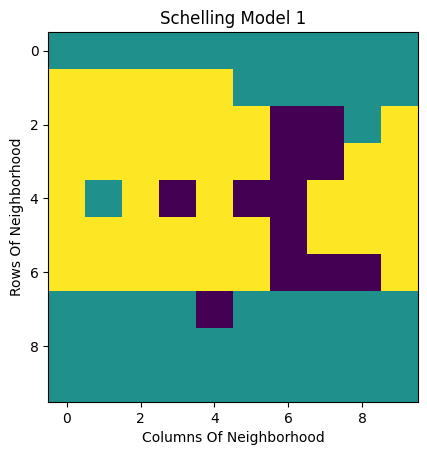

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 0, 0, 1, 2],
       [2, 2, 2, 2, 2, 2, 0, 0, 2, 2],
       [2, 1, 2, 0, 2, 0, 0, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 0, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 0, 0, 0, 2],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [982]:
world = startUp1and2()
check1(world)

### Main Function For Scenario 2:

#### 5 Points:

In [983]:
def check2(world):
    world, diff_check = SchellingModel2(world)
    #while some homes have too many different neighbors:
    while (diff_check > 12):
        world, diff_check = SchellingModel1(world)
        #if diff_check is over the thresh-hold:
        if (diff_check > 12):
            #print out the world, continue while loop
            print(world)
            continue
        #if every home has suffienct neighbors:
        elif (diff_check == 12):
            break
    #print out the world, then show image of world using plt.imshow() and return
    print(world)
    plt.imshow(world)
    plt.xlabel("Columns Of Neighborhood")
    plt.ylabel("Rows Of Neighborhood")
    plt.title("Schelling Model 2")
    #nameOfYourPlot.set_cmap() can be used to change the color scheme of the graphs if you would like to do so
    #look into colormappings if you would like to see a list of the various schemes that are available to you.
    plt.show()
    return world

[[1 1 1 2 1 2 2 1 1 2]
 [2 2 1 2 1 2 2 2 2 1]
 [1 1 2 1 2 1 1 1 1 1]
 [2 1 0 1 2 1 2 1 1 2]
 [1 2 2 1 2 0 2 2 2 1]
 [0 1 0 1 1 2 2 1 0 1]
 [2 1 0 2 1 2 2 1 2 1]
 [2 2 2 0 1 1 0 2 1 0]
 [2 1 1 0 1 0 1 2 2 1]
 [2 2 1 2 1 0 1 2 2 1]]


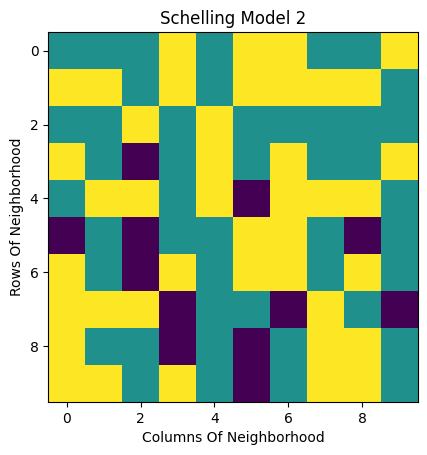

array([[1, 1, 1, 2, 1, 2, 2, 1, 1, 2],
       [2, 2, 1, 2, 1, 2, 2, 2, 2, 1],
       [1, 1, 2, 1, 2, 1, 1, 1, 1, 1],
       [2, 1, 0, 1, 2, 1, 2, 1, 1, 2],
       [1, 2, 2, 1, 2, 0, 2, 2, 2, 1],
       [0, 1, 0, 1, 1, 2, 2, 1, 0, 1],
       [2, 1, 0, 2, 1, 2, 2, 1, 2, 1],
       [2, 2, 2, 0, 1, 1, 0, 2, 1, 0],
       [2, 1, 1, 0, 1, 0, 1, 2, 2, 1],
       [2, 2, 1, 2, 1, 0, 1, 2, 2, 1]])

In [984]:
world = startUp1and2()
check2(world)

### Main Function For Scenario 3:

#### 5 Points:

In [985]:
def check3(world):
    world, diff_check = SchellingModel3(world)
    #while some homes have too many different neighbors:
    while (diff_check > 12):
        world, diff_check = SchellingModel1(world)
        #if diff_check is over the thresh-hold:
        if (diff_check > 12):
            #print out the world, continue while loop
            print(world)
            continue
        #if every home has suffienct neighbors:
        elif (diff_check == 12):
            break
    #print out the world, then show image of world using plt.imshow() and return
    print(world)
    plt.imshow(world)
    plt.xlabel("Columns Of Neighborhood")
    plt.ylabel("Rows Of Neighborhood")
    plt.title("Schelling Model 3")
    #nameOfYourPlot.set_cmap() can be used to change the color scheme of the graphs if you would like to do so
    #look into colormappings if you would like to see a list of the various schemes that are available to you.
    plt.show()
    return world

[[1 2 3 2 1 1 2 3 3 2]
 [2 3 2 1 1 1 3 3 2 2]
 [2 2 1 1 1 1 3 3 3 1]
 [2 0 2 1 1 1 3 2 3 3]
 [2 1 2 3 1 2 2 2 3 3]
 [2 3 3 3 2 1 3 1 2 2]
 [1 2 3 3 0 3 3 2 1 3]
 [3 3 2 0 3 0 2 1 1 2]
 [3 3 2 0 0 0 3 1 1 1]
 [1 2 3 1 0 0 0 0 0 1]]
[[3 2 1 3 1 1 2 3 2 2]
 [1 2 1 1 1 1 3 3 3 2]
 [2 2 3 1 1 1 3 3 3 3]
 [2 2 2 1 1 1 2 3 3 3]
 [2 3 1 3 1 1 3 3 2 3]
 [3 1 3 1 2 2 1 3 2 3]
 [2 1 0 2 2 1 0 3 3 3]
 [3 3 2 2 2 0 3 3 0 1]
 [1 0 2 2 2 1 2 1 0 1]
 [0 3 0 2 0 1 0 2 0 0]]
[[1 1 3 2 1 1 2 3 1 3]
 [1 2 3 1 1 1 3 3 3 2]
 [3 2 2 1 1 1 3 3 3 3]
 [2 3 2 1 1 1 2 3 3 3]
 [0 2 1 1 1 1 3 3 3 3]
 [2 3 1 2 1 1 3 3 1 3]
 [1 3 2 2 2 1 3 3 3 0]
 [0 2 2 2 2 2 3 3 2 1]
 [1 2 2 2 2 0 0 2 0 0]
 [1 0 2 2 2 3 0 0 0 0]]
[[1 3 1 2 1 2 3 2 2 2]
 [3 2 3 1 1 1 3 3 3 2]
 [3 1 1 1 1 1 3 3 3 3]
 [2 0 2 1 1 1 0 3 3 3]
 [1 3 1 1 1 1 3 3 3 3]
 [2 2 1 1 1 1 3 3 1 0]
 [1 3 2 2 2 3 3 3 3 0]
 [0 2 2 2 2 2 3 3 0 1]
 [3 2 2 2 2 3 2 1 0 0]
 [0 1 2 2 2 0 2 2 0 0]]
[[3 2 3 2 2 1 1 3 2 1]
 [2 1 2 1 1 3 3 3 3 2]
 [1 2 1 1 1 1 3 3 3 3]
 [2 1 2

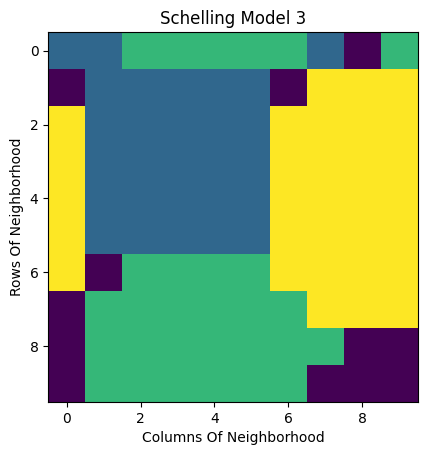

array([[1, 1, 2, 2, 2, 2, 2, 1, 0, 2],
       [0, 1, 1, 1, 1, 1, 0, 3, 3, 3],
       [3, 1, 1, 1, 1, 1, 3, 3, 3, 3],
       [3, 1, 1, 1, 1, 1, 3, 3, 3, 3],
       [3, 1, 1, 1, 1, 1, 3, 3, 3, 3],
       [3, 1, 1, 1, 1, 1, 3, 3, 3, 3],
       [3, 0, 2, 2, 2, 2, 3, 3, 3, 3],
       [0, 2, 2, 2, 2, 2, 2, 3, 3, 3],
       [0, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [0, 2, 2, 2, 2, 2, 2, 0, 0, 0]])

In [986]:
world = startUp3()
check3(world)